# GRIP : The Spark Foundation

### Data Science Business Analytics Intern - November, 2022 [#GRIPNOV22]

### Author : Varsha S Thambi

### TASK 6 : Exploratory Data Analysis- Sports

Perform Exploratory Data Analysis('Advance Level') on dataset 'Indian Premier League'.As a sports analysis, find out the most
successful teams,players and factors contributing win or loss of a team.

### Importing the dataset

In [57]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")


### Loading 1st Dataset

In [58]:
matches=pd.read_csv(r"C:\Users\varsh\OneDrive\Desktop\Indian Premier League\matches.csv")

In [59]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08/04/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [60]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


### Exploring 1st Data

In [61]:
# To find the number of rows and columns
matches.shape

(756, 18)

In [62]:
# To find more information about the data set
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [63]:
matches.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [64]:
matches.rename(columns={'id':'match_id'},inplace=True)

In [65]:
matches.describe()

,match_id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [66]:
# Check data type
matches.dtypes

match_id            int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [67]:
# Check missing values
matches.isnull().sum()

match_id             0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [68]:
# Now we will drop umpire3
matches=matches.drop(columns=["umpire3"])
matches.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08/04/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


### Loading 2nd Dataset

In [69]:
deliveries=pd.read_csv(r"C:\Users\varsh\OneDrive\Desktop\Indian Premier League\deliveries.csv")

In [70]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [71]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


### Exploring 2nd Data

In [72]:
# To find the number of rows and columns
deliveries.shape

(179078, 21)

In [73]:
# To find more information about the data set
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [74]:
deliveries.columns.values

array(['match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder'], dtype=object)

In [75]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [76]:
# Check data type
deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [77]:
# Check missing values
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### Now,We will merge the two datasets

In [78]:
# Merging two datasets
data=pd.merge(matches,deliveries,on="match_id",how="left")

In [79]:
data.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [80]:
data.tail()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2019,Hyderabad,12/05/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2019,Hyderabad,12/05/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2019,Hyderabad,12/05/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2019,Hyderabad,12/05/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2019,Hyderabad,12/05/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   season            179078 non-null  int64 
 2   city              177378 non-null  object
 3   date              179078 non-null  object
 4   team1             179078 non-null  object
 5   team2             179078 non-null  object
 6   toss_winner       179078 non-null  object
 7   toss_decision     179078 non-null  object
 8   result            179078 non-null  object
 9   dl_applied        179078 non-null  int64 
 10  winner            178706 non-null  object
 11  win_by_runs       179078 non-null  int64 
 12  win_by_wickets    179078 non-null  int64 
 13  player_of_match   178706 non-null  object
 14  venue             179078 non-null  object
 15  umpire1           178578 non-null  object
 16  umpire2           178578 non-null  obj

In [82]:
data.describe()

,match_id,season,dl_applied,win_by_runs,win_by_wickets,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,2013.444510,0.017914,13.404036,3.261579,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,3.363947,0.132639,23.261007,3.347033,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,2008.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,2011.000000,0.000000,0.000000,0.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,2013.000000,0.000000,0.000000,3.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2016.000000,0.000000,19.000000,6.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [83]:
data.shape

(179078, 37)

### visuzlization

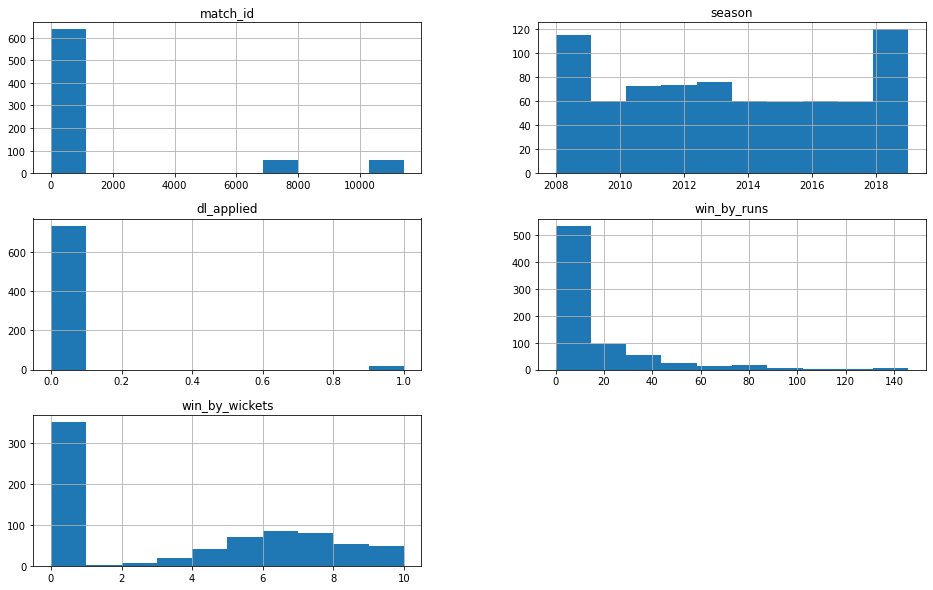

In [84]:
matches.hist(figsize=(16,10))
plt.show()

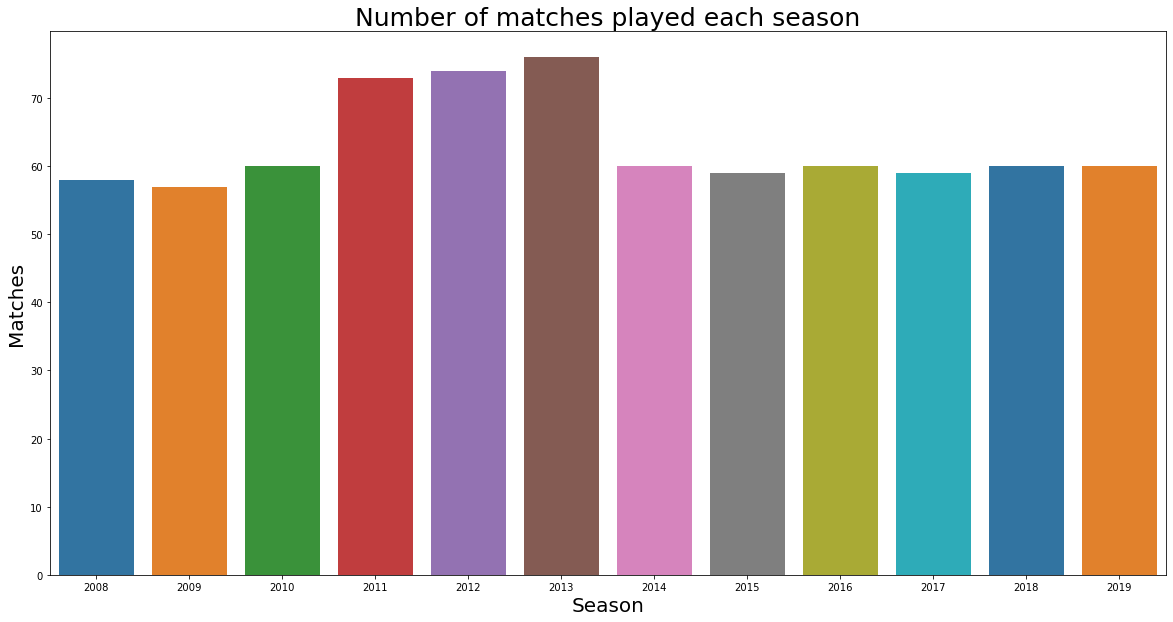

In [85]:
plt.figure(figsize=(20,10))
sns.countplot('season',data=matches,palette='tab10')
plt.xlabel("Season",fontsize=20)
plt.ylabel("Matches",fontsize=20)
plt.title("Number of matches played each season",fontsize=25)
plt.show()

- Here In The Year 2013,2012 And 2011 There Was Maximum Number of Matches Has Been Played.

- All other seasons have approximately 50-60 matches while 2011-2013 have more than 70 matches.

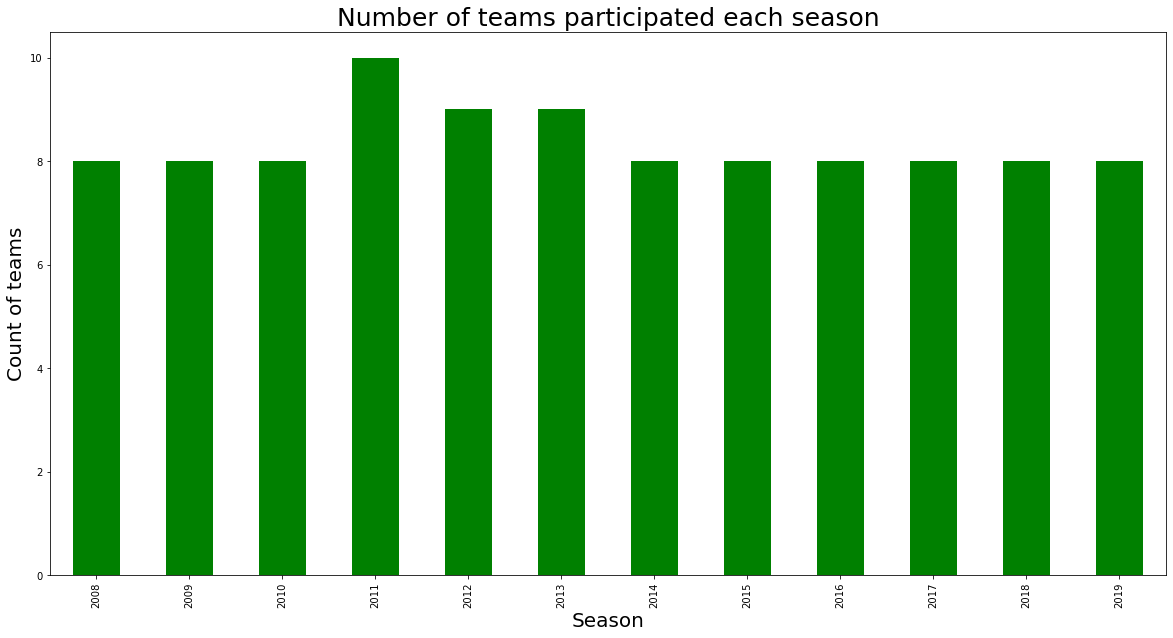

In [86]:
matches.groupby('season')['team1'].nunique().plot(kind='bar',figsize=(20,10),color='green')
plt.xlabel("Season",fontsize=20)
plt.ylabel("Count of teams",fontsize=20)
plt.title("Number of teams participated each season",fontsize=25)
plt.show()

- We can see that 10 team played in 2011 and 9 teams each in 2012 and 2013

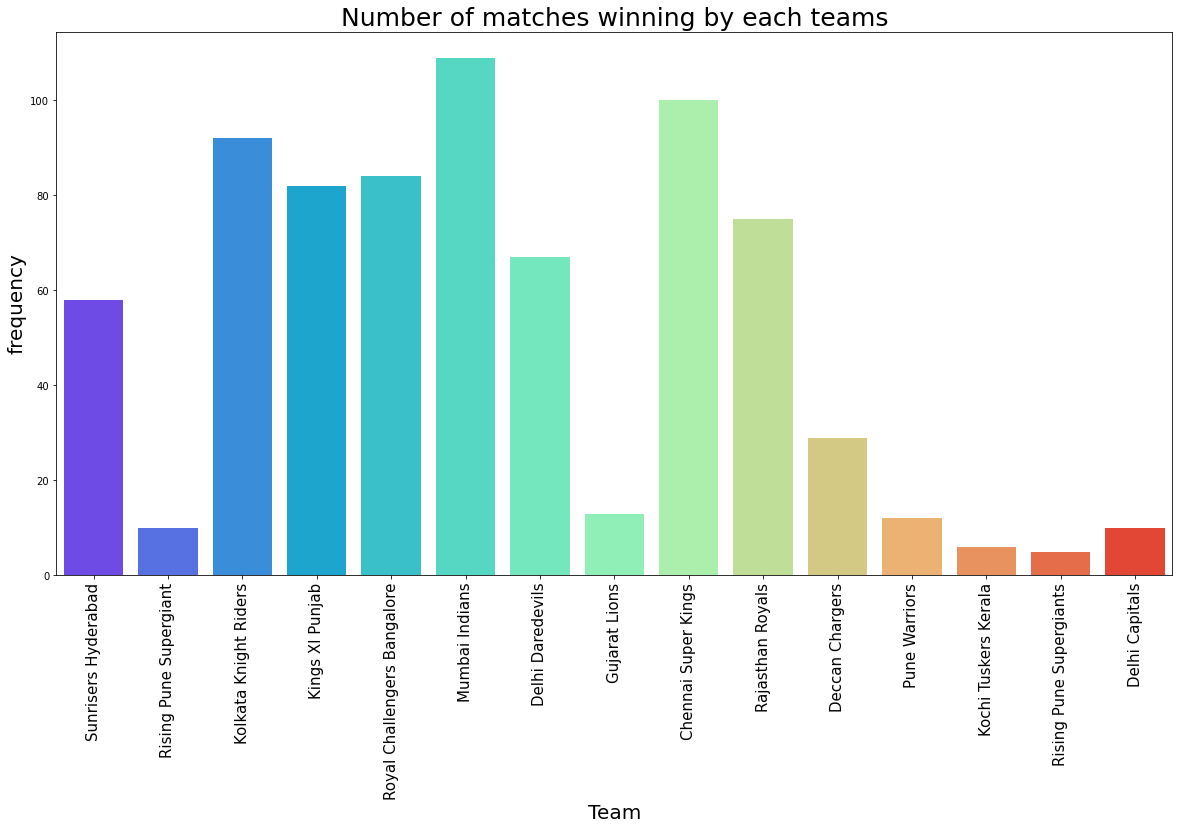

In [93]:
plt.figure(figsize=(20,10))
sns.countplot('winner',data=matches,palette='rainbow')
plt.xlabel("Team",fontsize=20)
plt.ylabel("frequency",fontsize=20)
plt.title("Number of matches winning by each teams",fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.show()

- MI is the top team by winning matches and second position is CSK.

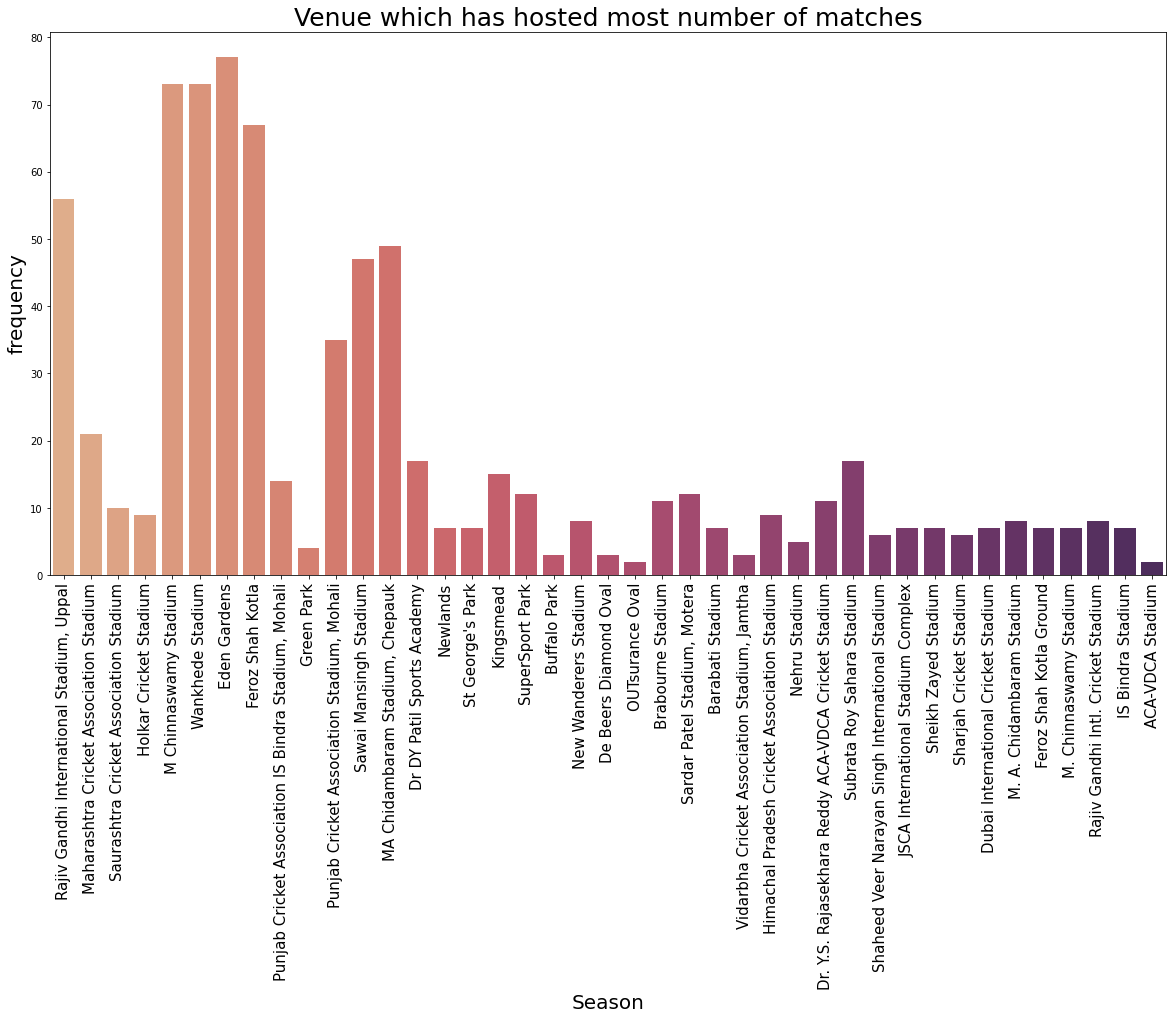

In [94]:
plt.figure(figsize=(20,10))
sns.countplot('venue',data=matches,palette="flare")
plt.xlabel("Season",fontsize=20)
plt.ylabel("frequency",fontsize=20)
plt.title("Venue which has hosted most number of matches",fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.show()

- Eden Gardens in kolkata has hosted highest number of IPL matches.
- M Chinnaswamy Stadium in Bangaluru has hosted the highest number of matches.

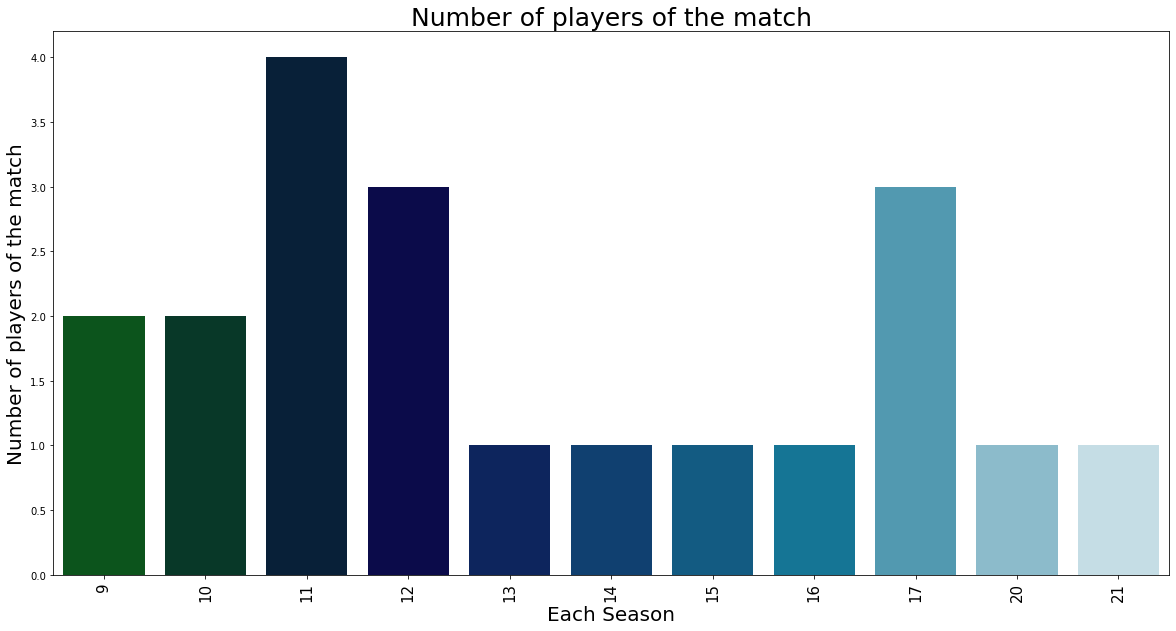

In [90]:
plt.figure(figsize=(20,10))
sns.countplot(matches['player_of_match'].value_counts()[:20],data=matches,palette="ocean")
plt.xlabel("Each Season",fontsize=20)
plt.ylabel("Number of players of the match",fontsize=20)
plt.title("Number of players of the match",fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.show()

- Most of the team has 11,12,17 players.
- 21 is the least number of players.

### Does the team choosed to bat or field first, after winning toss?

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

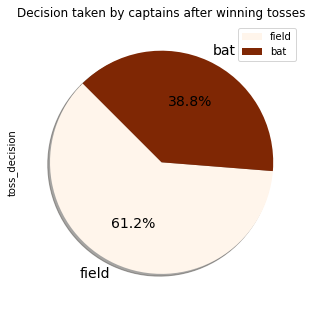

In [95]:
matches['toss_decision'].value_counts().plot(kind='pie',fontsize=14,autopct="%3.1f%%",shadow=True,startangle=135,
                                           figsize=(5,6),legend=True,cmap='Oranges')
plt.title('Decision taken by captains after winning tosses')

- After Winning The Toss, The Maximum Probability Is Chossing A Field First And It Is 61%.


In [96]:
matches_group=matches.groupby('season')['team1','team2'].agg(sum)
print('The Team-1 Vs Team-2')
matches_group

The Team-1 Vs Team-2


,team1,team2
season,,
2008,Kolkata Knight RidersChennai Super KingsRajast...,Royal Challengers BangaloreKings XI PunjabDelh...
2009,Mumbai IndiansRoyal Challengers BangaloreKings...,Chennai Super KingsRajasthan RoyalsDelhi Dared...
2010,Kolkata Knight RidersMumbai IndiansKings XI Pu...,Deccan ChargersRajasthan RoyalsDelhi Daredevil...
2011,Chennai Super KingsDeccan ChargersKochi Tusker...,Kolkata Knight RidersRajasthan RoyalsRoyal Cha...
2012,Chennai Super KingsKolkata Knight RidersPune W...,Mumbai IndiansDelhi DaredevilsMumbai IndiansKi...
2013,Delhi DaredevilsRoyal Challengers BangaloreSun...,Kolkata Knight RidersMumbai IndiansPune Warrio...
2014,Kolkata Knight RidersDelhi DaredevilsChennai S...,Mumbai IndiansRoyal Challengers BangaloreKings...
2015,Mumbai IndiansChennai Super KingsRajasthan Roy...,Kolkata Knight RidersDelhi DaredevilsKings XI ...
2016,Mumbai IndiansDelhi DaredevilsKings XI PunjabR...,Rising Pune SupergiantsKolkata Knight RidersGu...


In [97]:
matches_group=matches.groupby('winner')['win_by_runs','win_by_wickets'].agg(sum)
print('The winner of teams How many Runs and How many Wickets by they won Team')
matches_group

The winner of teams How many Runs and How many Wickets by they won Team


,win_by_runs,win_by_wickets
winner,,
Chennai Super Kings,1778,289
Deccan Chargers,421,72
Delhi Capitals,92,29
Delhi Daredevils,675,275
Gujarat Lions,1,65
Kings XI Punjab,925,268
Kochi Tuskers Kerala,23,30
Kolkata Knight Riders,1086,351
Mumbai Indians,1866,307


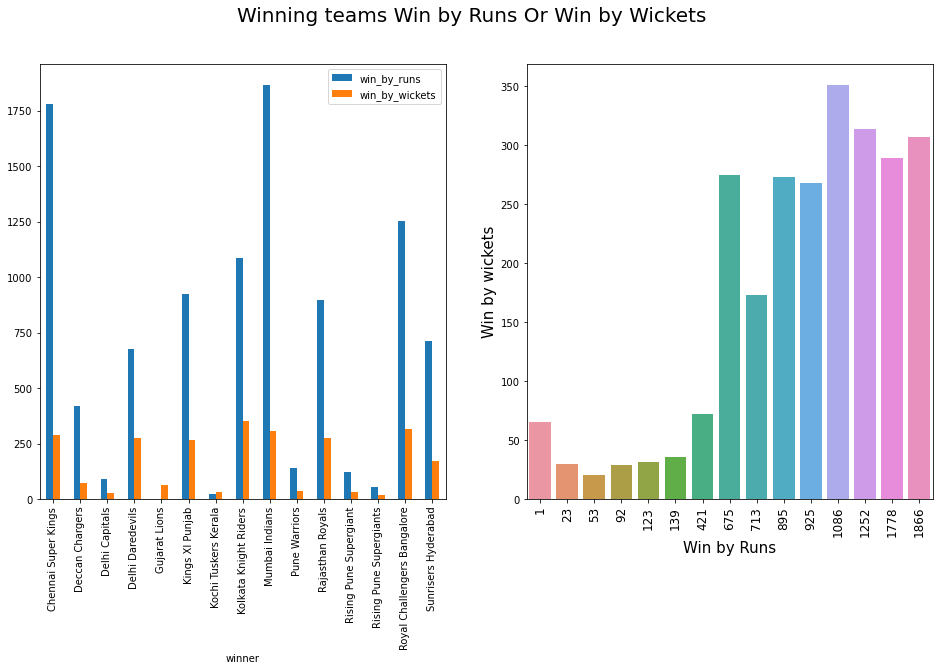

In [98]:
fig,axes=plt.subplots(1,2,figsize=(16,8))
fig.suptitle("Winning teams Win by Runs Or Win by Wickets",fontsize=20)
sns.barplot(data=matches_group,x='win_by_runs',y='win_by_wickets',ax=axes[1])
matches_group.plot(kind='bar',ax=axes[0])
plt.xlabel("Win by Runs",fontsize=15)
plt.ylabel("Win by wickets",fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.show()

- Run wise MI is the top winning team and Wicket wise winning is Kolkata knight Riders.

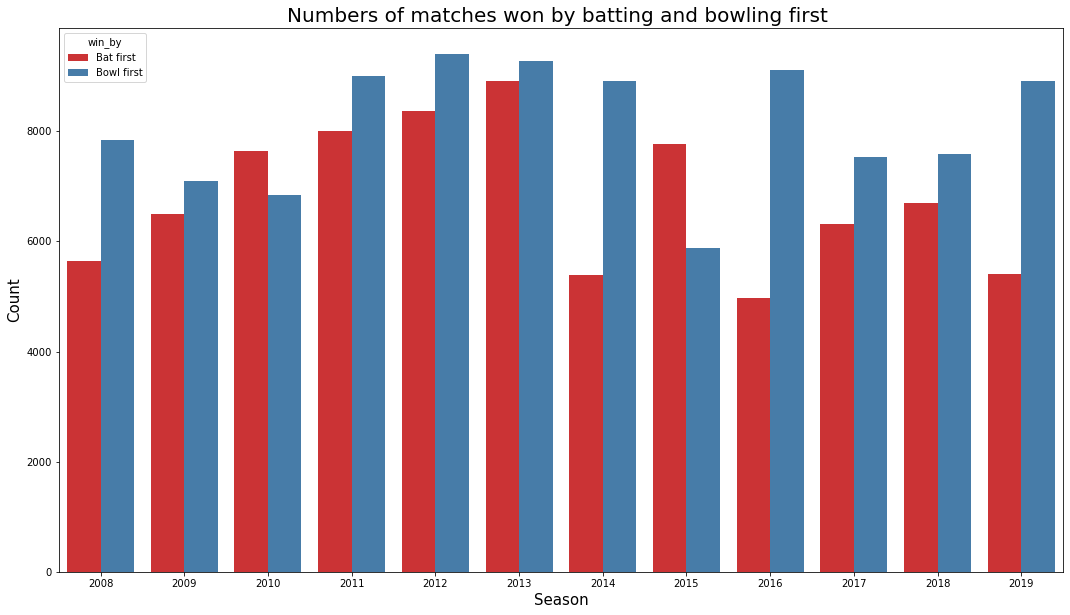

In [99]:
data['win_by']=np.where(data['win_by_runs']>0,'Bat first','Bowl first')
plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by',data=data,palette='Set1')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

- Here We Can See That Maximum Number of Matches Win By Chossing Bowling First.


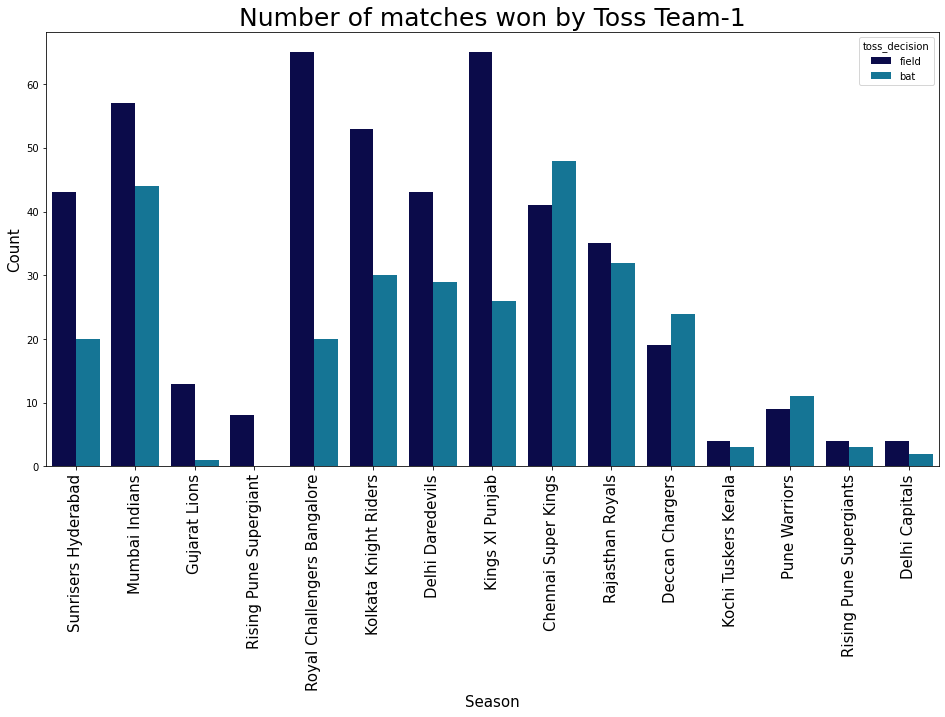

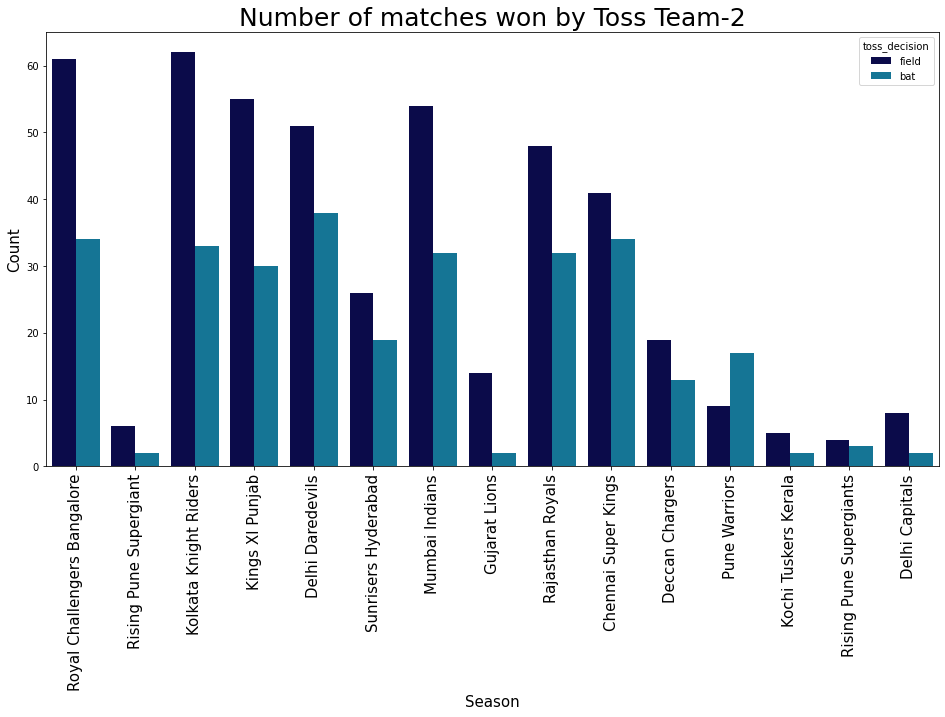

In [100]:
#we will plot graph on Number of matches won by Toss result
plt.subplots(1,1,figsize=(16,8))
sns.countplot('team1',hue='toss_decision',data=matches,palette="ocean")
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Number of matches won by Toss Team-1",fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.show()

plt.subplots(1,1,figsize=(16,8))
sns.countplot('team2',hue='toss_decision',data=matches,palette="ocean")
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Number of matches won by Toss Team-2",fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.show()

- We Can See That In Recent Years There Is High Rate of Winning When The Team Choosing Field First After Winning The Toss.

In [101]:
#print winner Season wise
matches=matches.drop_duplicates(subset=['season'],keep='last')
matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


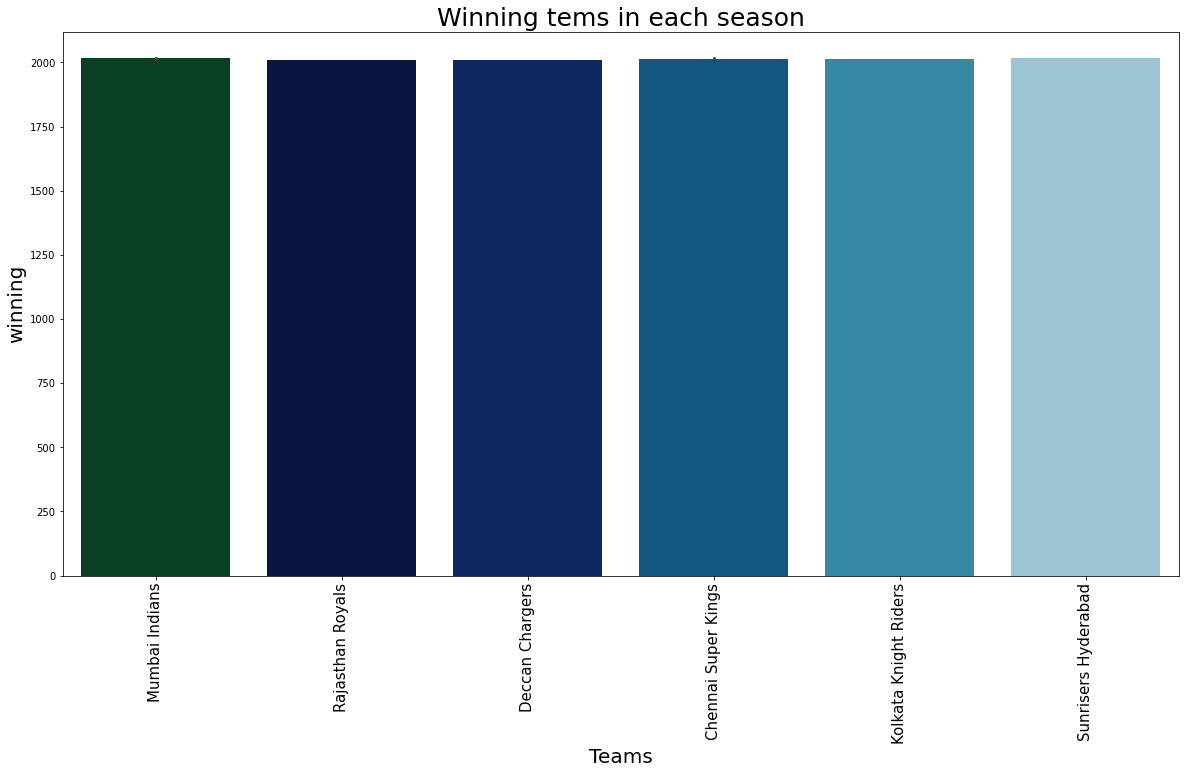

In [102]:
plt.figure(figsize=(20,10))
sns.barplot(x=matches['winner'],y=matches['season'],palette="ocean")
plt.xlabel("Teams",fontsize=20)
plt.ylabel("winning",fontsize=20)
plt.title("Winning tems in each season",fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.show()

Text(0.5, 0, 'Players')

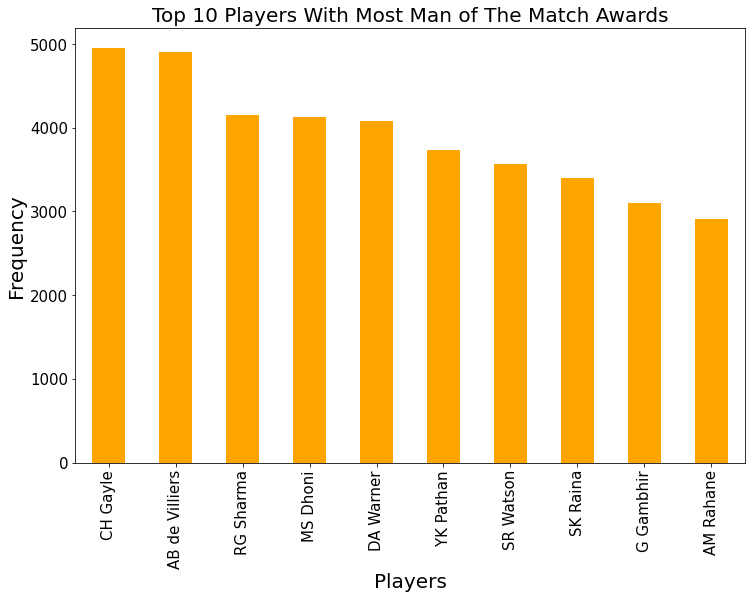

In [103]:
Man_of_The_Match = data['player_of_match'].value_counts()
Man_of_The_Match.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color="orange")
plt.title("Top 10 Players With Most Man of The Match Awards",fontsize=20)
plt.ylabel("Frequency", size = 20)
plt.xlabel("Players", size = 20) 

- CH Gayle And AB de Villiers Are Two Players Who Wins The Most Number of Man of The Match Awards In IPL.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

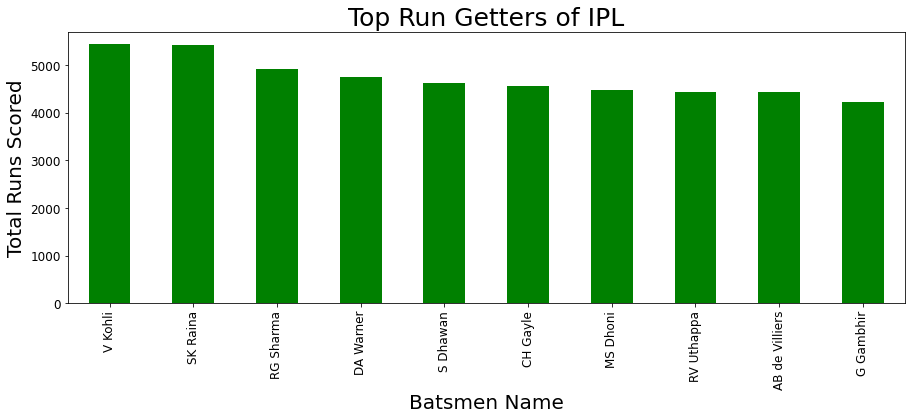

In [104]:
data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar',color="green",
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 25)
plt.xlabel("Batsmen Name", size = 20)
plt.ylabel("Total Runs Scored", size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)

- Virat Kohli And Suresh Raina Are The Top Players Who Make Top Runs In The IPL.

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

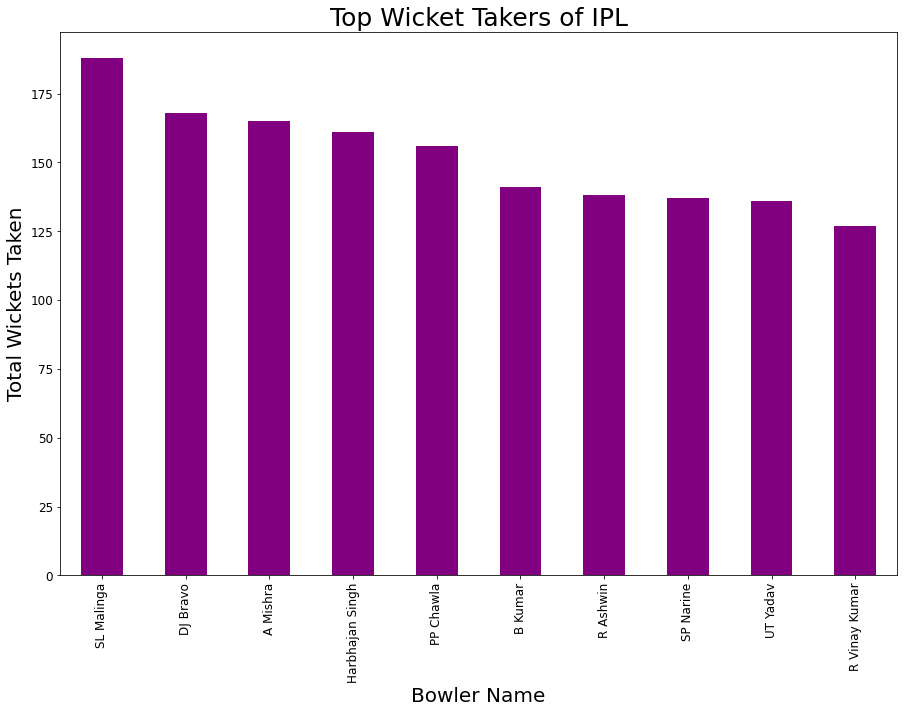

In [112]:
data.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'purple', figsize = (15,10))
plt.title("Top Wicket Takers of IPL", fontsize = 25,)
plt.xlabel("Bowler Name", size = 20)
plt.ylabel("Total Wickets Taken", size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)


- SL Malinga Is The Highest Wicket Taker Bowler In The IPL.

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

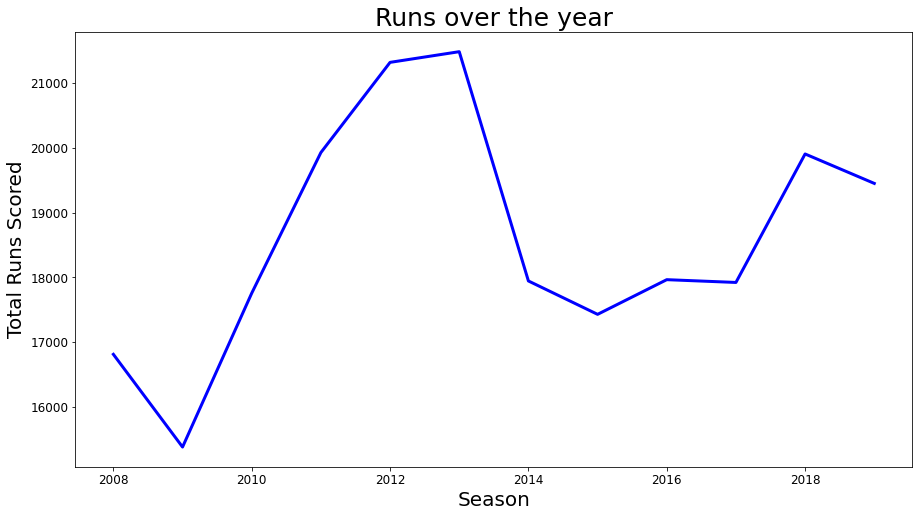

In [110]:
data.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth=3, 
                                                color = 'blue', figsize = (15,8))
plt.title("Runs over the year", fontsize = 25,)
plt.xlabel("Season", size = 20)
plt.ylabel("Total Runs Scored", size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)

- Run scoring has gone up from the start of the IPL in 2008.